In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
# Define the Lorentzian function
def lorentzian(x, x0, gamma, A):
    return A * (1/np.pi) * (gamma / ((x - x0)**2 + gamma**2))

In [2]:
def FWHM_calculator(xdf,s,e):
    df = pd.read_csv(xdf)
    df['Channels'] = df.index + 1
    df = df.iloc[s:e]
    plt.figure(figsize=(10,5))
    plt.plot(df['Channels'],df['Count'],label="Observed")
    i = [max(df['Count']), 100,12000]
    params, covt = curve_fit(lorentzian,df['Channels'],df['Count'], p0=i)
    preds = lorentzian(df['Channels'],params[0],params[1], params[2])
    print(f"x0:{params[0]}, gamma:{2*params[1]}, A:{params[2]}, Max:{max(preds)}, Resolution:{(2*params[1]*100/params[0])}%")
    plt.plot(df['Channels'],preds,label="Fitted")
    plt.title(f"Energy Spectrum for {xdf[:-4]}")
    plt.axvline(x=params[0], color='red',label='Peak Channel')
    plt.axvline(x=params[0]+params[1], color='blue',label='Width', linestyle='--')
    plt.axvline(x=params[0]-params[1], color='blue', linestyle='--')
    plt.axhline(y=max(preds)/2, label='Half Maximum', linestyle='--')
    plt.xlabel("Channels")
    plt.ylabel("Count")
    plt.legend()
    plt.savefig(f"{xdf[:-4]}.png")

x0:239.42419906504006, gamma:75.77010127963246, A:1468486.8004596382, Max:12336.667425033296, Resolution:31.646801607990074%


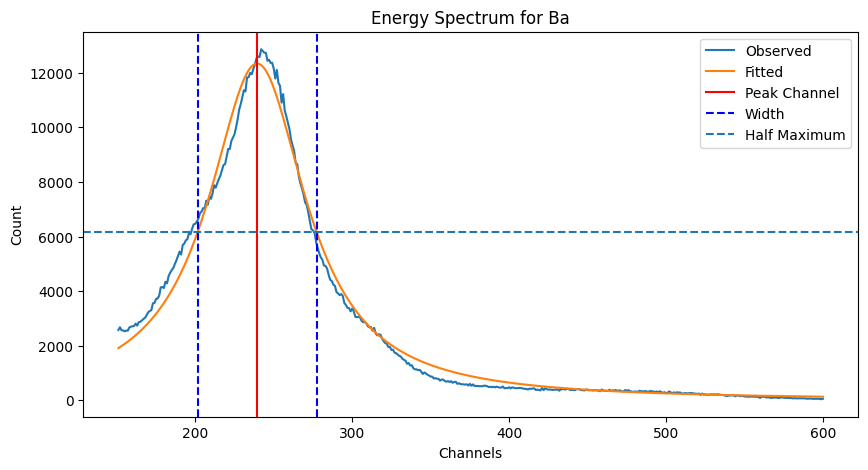

In [3]:
FWHM_calculator('Ba.txt',150,600)

x0:104.0962004255733, gamma:12.28065186539756, A:19553.1228120264, Max:1013.3704696354181, Resolution:11.797406452100027%


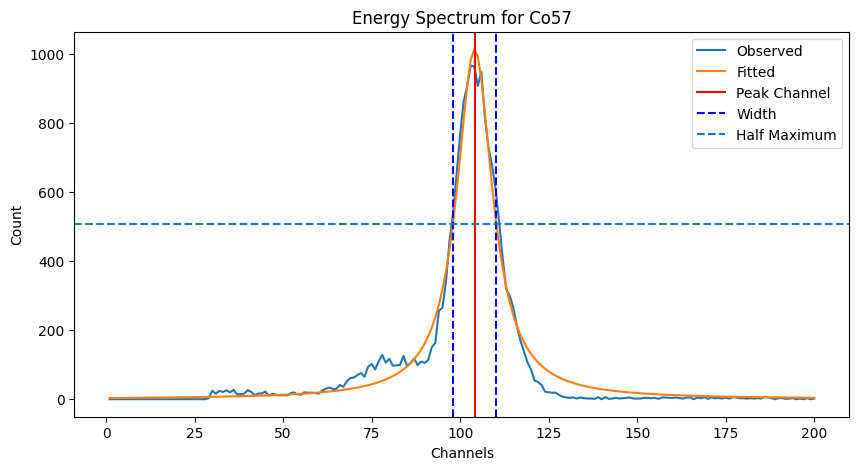

In [4]:
FWHM_calculator('Co57.txt',0,200)

x0:811.3151936817436, gamma:113.58953401331253, A:279852.3445468821, Max:1568.4019697842768, Resolution:14.00066643616569%


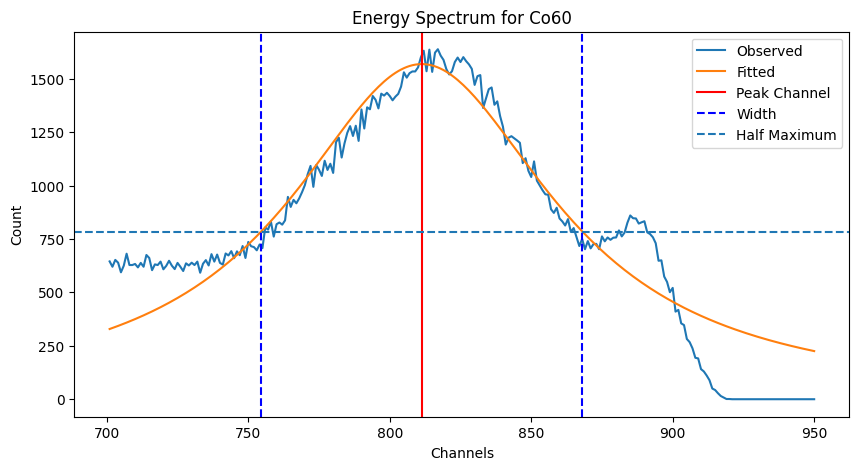

In [5]:
FWHM_calculator('Co60.txt',700,950)

x0:443.5719040684269, gamma:49.08184784796358, A:772120.5251932665, Max:10011.800345071711, Resolution:11.065139022058542%


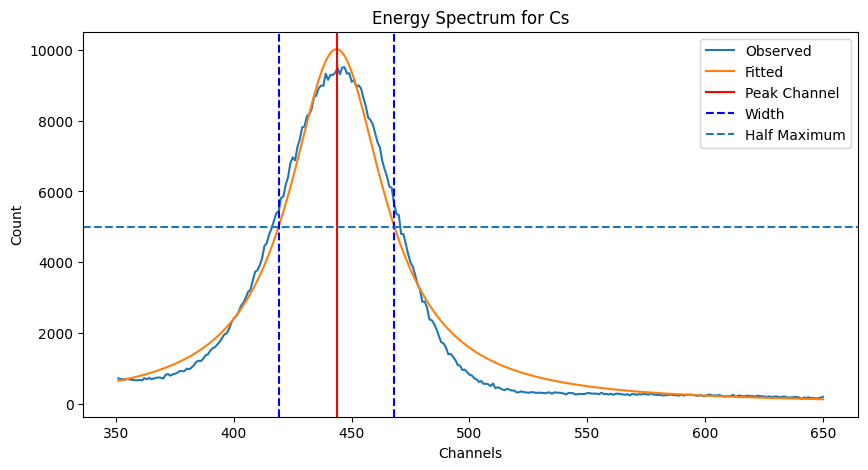

In [6]:
FWHM_calculator('Cs.txt',350,650)

x0:338.35549821256274, gamma:52.76901949688931, A:616482.2749980484, Max:7436.05951863171, Resolution:15.595732824101646%


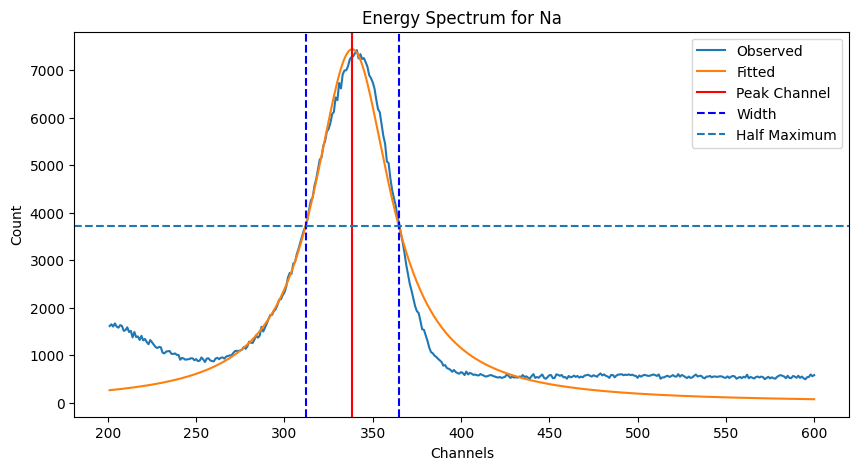

In [7]:
FWHM_calculator('Na.txt',200,600)

In [ ]:
Resolutions = [31.64,11.065, 14.00, 15.59, 11.79]
np.mean(Resolutions)

Caliberation Constant 0.001453591076207059
Energy of Na22: 0.4918298085900395eV


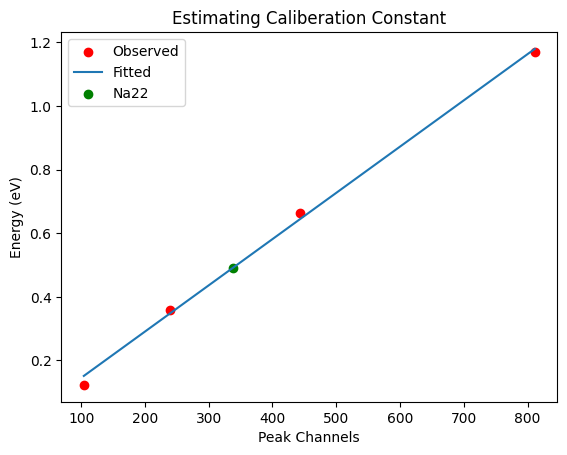

In [16]:
Elements = ['Co57', 'Ba133', 'Cs137', 'Co60', 'Na22']
Energy = np.array([0.123, 0.36, 0.662, 1.17]) #Na22: 0.511
Peack_channels = np.array([104.096, 239.424,  443.572, 811.315]) #Na22: , 338.355
plt.scatter(Peack_channels, Energy, color='red', label='Observed')
def line(x,m):
    return m*x
params, covt = curve_fit(line, Peack_channels, Energy)
pred_x = line(Peack_channels, params[0])
plt.plot(Peack_channels, pred_x, label='Fitted')
plt.scatter(338.355, line(338.355,params[0]), color='green' ,label='Na22')
plt.xlabel('Peak Channels')
plt.ylabel('Energy (eV)')
plt.title('Estimating Caliberation Constant')
plt.legend()
plt.savefig('CaliberationConstant.png')
print("Caliberation Constant",params[0])
print(f"Energy of Na22: {params[0]*338.355}eV")

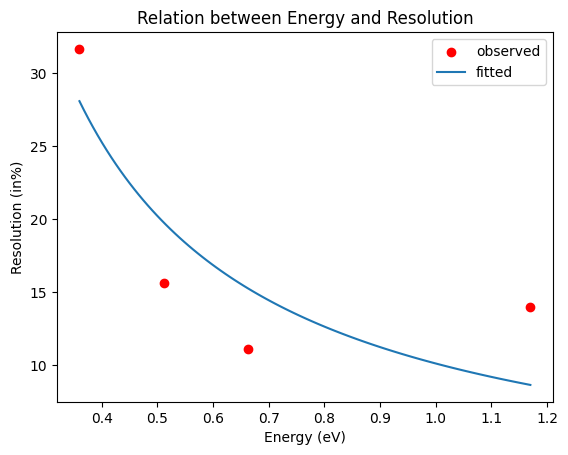

In [9]:
Resolutions = np.array([31.64,11.065, 14.00, 15.59 ])
Energy2 = np.array([0.36, 0.662, 1.17, 0.511]) 
plt.scatter(Energy2, Resolutions, label='observed', c='red')
def line2(x,m):
    return m/x
params, covt = curve_fit(line2, Energy2, Resolutions)
PC2 = np.linspace(min(Energy2), max(Energy2),100)
preds_y = line2(PC2, params[0])
plt.plot(PC2 ,preds_y, label='fitted')
plt.xlabel('Energy (eV)')
plt.ylabel('Resolution (in%)')
plt.legend()
plt.title('Relation between Energy and Resolution')
plt.savefig('EnergyVSResolution.png');